#++++다음 분기에 어떤 게임을 설계해야

*   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

*   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다


연도별 잘팔리는 플랫폼 트랜드 그래프

연도별 발팔리는 장르 트랜드



*   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다

가장 잘팔린 게임/ 플랫폼/ 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

#데이터 탐색


In [2]:
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv")
df.shape

(16598, 10)

In [198]:
df.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [3]:
df.sample(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3838,3839,Angry Birds,PC,2011.0,Puzzle,Focus Home Interactive,0,0.18,0,0.05
16083,16084,Blues Brothers 2000,N64,2000.0,Platform,Virgin Interactive,0.04,0.01,0,0
10521,10522,SnoCross Championship Racing,PS,1999.0,Racing,Ubisoft,0.52,0.35,0,0.06
12946,12947,Higurashi no Nakukoru ni Kizuna: Dai-Ni-Kan - Sou,DS,2008.0,Adventure,Alchemist,0,0,0.1,0
5553,5554,Disney Fairies: Tinker Bell and the Lost Treasure,DS,2009.0,Adventure,Disney Interactive Studios,0.57,0.35,0.02,0.1
4311,4312,Jikkyou Powerful Major League 2009,PS2,2009.0,Sports,Konami Digital Entertainment,0,0,0.08,0
9808,9809,Hakuouki,PS2,2008.0,Adventure,Idea Factory,0,0,0.03,0
4208,4209,Logic Machines,DS,2009.0,Puzzle,City Interactive,0.04,0,0,0
14694,14695,Hakuouki SSL: Sweet School Life,PSV,2014.0,Adventure,Idea Factory,0,0,0.05,0
4867,4868,Pariah,XB,2005.0,Action,Hip Interactive,0.08,0.02,0,0


🕹️ Data Description</br>
Name : 게임의 이름입니다.</br>
Platform : 게임이 지원되는 플랫폼의 이름입니다.</br>
Year : 게임이 출시된 연도입니다.</br>
Genre : 게임의 장르입니다.</br>
Publisher : 게임을 배급한 회사입니다.</br>
NA_Sales : 북미지역에서의 출고량입니다.</br>
EU_Sales : 유럽지역에서의 출고량입니다.</br>
JP_Sales : 일본지역에서의 출고량입니다.</br>
Other_Sales : 기타지역에서의 출고량입니다.</br>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


#데이터 정제

✔ unnamed 
- 칼럼 삭제 

✔ year 
- float -> object로
- 범위안에 해당하지않는 값 ex.) 0 -> 2000, 98 -> 1998 변환
- 결측치 확인

✔ Genre
- 결측치 확인

✔ _Sales
- 출고량 단위 통일, 정수형으로 변환

In [5]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=df_clean.columns[0], axis=1)                   #unnamed
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
data_null = df_clean[df_clean['Year'].isnull() | 
                     df_clean['Genre'].isnull() | 
                     df_clean['Publisher'].isnull()]                            #결측값 확인
data_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [7]:
df_clean['Year'].sort_values()

9276     0.0
16394    0.0
14666    0.0
2249     1.0
8681     1.0
        ... 
16240    NaN
16275    NaN
16278    NaN
16425    NaN
16432    NaN
Name: Year, Length: 16598, dtype: float64

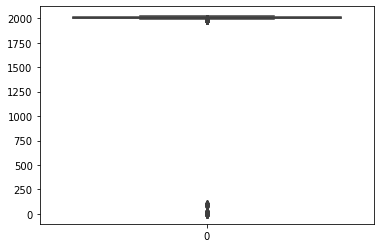

In [8]:
sns.boxplot(data=df_clean['Year']);

In [9]:
def error_year(temp):
  if (temp < 50):                                                               #0~49 -> 2000~2049
    temp += 2000
  elif (temp >= 50)&(temp < 100):                                               #50~99 -> 1950~1999
    temp += 1900
  else:
    pass
  return temp

In [10]:
df_clean['Year'] = df_clean['Year'].apply(error_year)
df_clean['Year']

0        2008.0
1        2009.0
2        2010.0
3        2010.0
4        2010.0
          ...  
16593    2006.0
16594    2005.0
16595    2015.0
16596    2013.0
16597    1996.0
Name: Year, Length: 16598, dtype: float64

In [11]:
df_clean['Year'] = df_clean.Year.astype(str).str[:-2]                              #str로
df_clean['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16598, dtype: object

In [199]:
df_clean['Year'].sort_values()

13133       1980
14264       1980
5723        1980
7317        1980
10121       1980
          ...   
5674     Unknown
9920     Unknown
7847     Unknown
6512     Unknown
15499    Unknown
Name: Year, Length: 16597, dtype: object

In [12]:
df_clean['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
n        271
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [13]:
df_clean['Year'] = df_clean['Year'].str.replace('n', 'Unknown')
df_clean['Year'].value_counts()

2009       1431
2008       1428
2010       1259
2007       1202
2011       1139
2006       1008
2005        941
2002        829
2003        775
2004        763
2012        657
2015        614
2014        582
2013        546
2001        482
1998        379
2000        349
2016        344
1999        338
1997        289
Unknown     271
1996        263
1995        219
1994        121
1993         60
1981         46
1992         43
1991         41
1982         36
1986         21
1983         17
1989         17
1990         16
1987         16
1988         15
1984         14
1985         14
1980          9
2017          3
2020          1
Name: Year, dtype: int64

In [14]:
df_clean['Genre'] = df_clean['Genre'].fillna('Unknown')
df_clean['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Unknown           50
Name: Genre, dtype: int64

In [15]:
df_clean['Publisher'] = df_clean['Publisher'].fillna('Unknown')
df_clean['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Game Arts                          1
Max Five                           1
CCP                                1
Quelle                             1
Just Flight                        1
Name: Publisher, Length: 578, dtype: int64

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16598 non-null  object
 1   Platform     16598 non-null  object
 2   Year         16598 non-null  object
 3   Genre        16598 non-null  object
 4   Publisher    16598 non-null  object
 5   NA_Sales     16598 non-null  object
 6   EU_Sales     16598 non-null  object
 7   JP_Sales     16598 non-null  object
 8   Other_Sales  16598 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [17]:
df_clean[df_clean['NA_Sales'].str.contains('K', na=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0K,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,120K,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16492,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [18]:
df_clean['NA_Sales'].sort_values()

8298        0
7847        0
7846        0
7845        0
7843        0
         ... 
6248     9.67
10650    9.81
14347     90K
13798     90K
13057     90K
Name: NA_Sales, Length: 16598, dtype: object

In [19]:
df_clean['NA_Sales']

0        0.04
1        0.17
2           0
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597       0
Name: NA_Sales, Length: 16598, dtype: object

In [20]:
def error_sales(temp):
  if ('K' in temp):
    temp = float(temp.replace('K', '')) * 1000
  elif ('M' in temp):
    temp = float(temp.replace('M', '')) * 1000000
  else:
    temp = float(temp) * 1000000
  return int(temp)

In [21]:
df_clean['NA_Sales'] = df_clean['NA_Sales'].apply(error_sales)
df_clean['NA_Sales']

0         40000
1        170000
2             0
3         40000
4        120000
          ...  
16593    150000
16594     10000
16595    440000
16596     50000
16597         0
Name: NA_Sales, Length: 16598, dtype: int64

In [22]:
df_clean['NA_Sales'].sort_values()

8298            0
7892            0
7891            0
7889            0
7879            0
           ...   
12579    15850000
1203     23200000
10488    26930000
4199     29080000
2908     41490000
Name: NA_Sales, Length: 16598, dtype: int64

In [23]:
df_clean['EU_Sales'] = df_clean['EU_Sales'].apply(error_sales)
df_clean['JP_Sales'] = df_clean['JP_Sales'].apply(error_sales)
df_clean['Other_Sales'] = df_clean['Other_Sales'].apply(error_sales)

In [24]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [25]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16598 non-null  object
 1   Platform     16598 non-null  object
 2   Year         16598 non-null  object
 3   Genre        16598 non-null  object
 4   Publisher    16598 non-null  object
 5   NA_Sales     16598 non-null  int64 
 6   EU_Sales     16598 non-null  int64 
 7   JP_Sales     16598 non-null  int64 
 8   Other_Sales  16598 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [27]:
data_duplicated = df_clean[df_clean.duplicated()]                               #중복값 확인
data_duplicated

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,Unknown,Shooter,Nintendo,0,0,20000,0


In [28]:
df_clean = df_clean.drop_duplicates()
df_clean.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16593,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16594,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16595,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [29]:
data_duplicated = df_clean[df_clean.duplicated()]                               #중복값 확인
data_duplicated

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [53]:
df_clean.to_csv('game_final.csv', index=False)

#일단끝

isalpha()/isdigit()]

- 지역별 선호 게임장르
- 연도별 판매량 높은 게임
- 잘팔리는 게임 분석

====================================

- 플래폼 끼리의 판매량 비교
- 연도에 따른 플랫폼 증가 수위 (리메이크 여부)
- 장르별 플랫폼 선호도

In [30]:
df_clean.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


NA_Sales       264683.375249
EU_Sales       146660.841598
JP_Sales        77785.141712
Other_Sales     48065.915286
dtype: float64

In [31]:
round(df_clean.groupby('Year').mean(), 2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,1176666.67,74444.44,0.00,13333.33
1981,726086.96,42608.70,0.00,6956.52
1982,747777.78,45833.33,0.00,8611.11
1983,456470.59,47058.82,476470.59,8235.29
1984,2377142.86,150000.00,1019285.71,50000.00
1985,2409285.71,338571.43,1040000.00,65714.29
1986,595238.10,135238.10,943333.29,91904.76
1987,528749.94,88125.00,726875.00,12500.00
1988,1591333.33,439333.33,1050666.67,66000.00


In [32]:
df_clean.groupby('Genre').mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,264692.888654,157990.921936,47776.096823,56414.522844
Adventure,82546.875000,50039.062500,40585.937500,13132.812500
Fighting,263518.297521,119504.132231,103116.883117,43258.559622
Misc,235322.952134,122468.281430,60709.342561,42698.961361
Platform,505022.623303,228065.609729,147794.116516,58291.855204
Puzzle,213408.302768,87768.166090,98391.003460,21660.899654
Racing,287361.220434,190748.189059,45374.094932,62027.353178
Role-Playing,215468.643965,123789.614295,232602.831423,38408.631153
Shooter,445233.356542,239517.977047,29273.144606,78538.638103


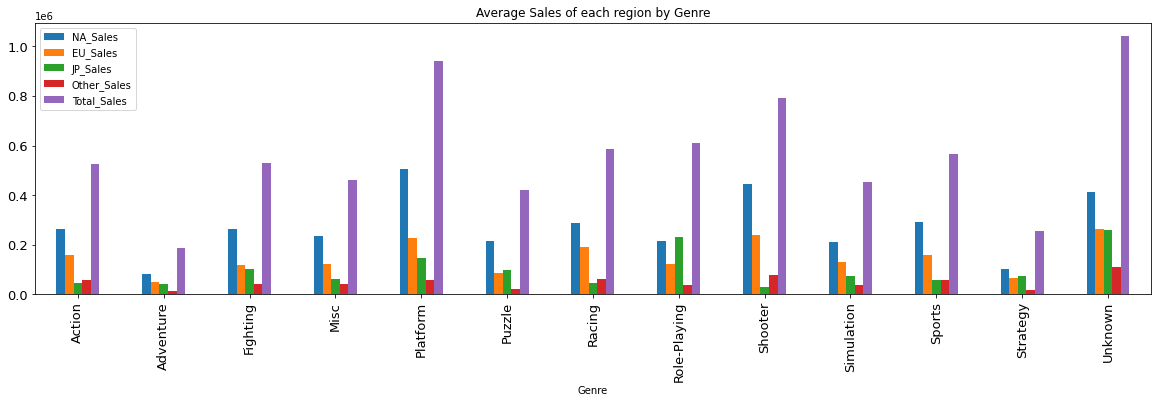

In [166]:
df_clean.groupby(['Genre']).mean().plot(kind='bar', 
                                        title='Average Sales of each region by Genre', 
                                        fontsize=13,
                                        figsize=(20,5));

In [60]:
df_clean.groupby('Genre')['NA_Sales'].mean().sort_values()

Genre
Adventure        82546.875000
Strategy        101029.411765
Simulation      211514.448555
Puzzle          213408.302768
Role-Playing    215468.643965
Misc            235322.952134
Fighting        263518.297521
Action          264692.888654
Racing          287361.220434
Sports          290696.281931
Unknown         412200.000000
Shooter         445233.356542
Platform        505022.623303
Name: NA_Sales, dtype: float64

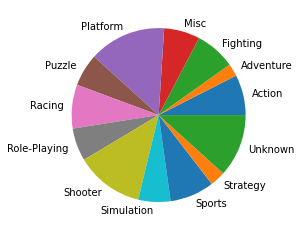

In [35]:
# 이곳에 코드를 작성하세요.
ratio = df_clean.groupby('Genre')['NA_Sales'].mean()
labels = ['Action', 'Adventure','Fighting', 'Misc','Platform', 'Puzzle','Racing', 
          'Role-Playing','Shooter', 'Simulation','Sports', 'Strategy','Unknown']
plt.pie(x=ratio, labels=labels)

plt.show()

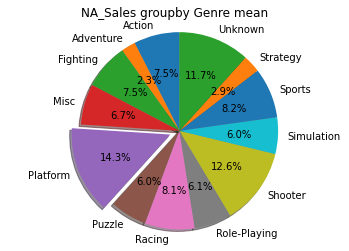

In [223]:
labels = ['Action', 'Adventure','Fighting', 'Misc','Platform', 'Puzzle','Racing', 
          'Role-Playing','Shooter', 'Simulation','Sports', 'Strategy','Unknown']
sizes = df_clean.groupby('Genre')['NA_Sales'].mean()
explode = (0,0,0,0,0.1,0,0,0,0,0,0,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('NA_Sales groupby Genre mean')
plt.show()

In [36]:
df_clean['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1307
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Unknown           50
Name: Genre, dtype: int64

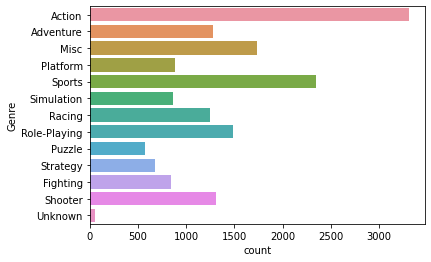

In [59]:
sns.countplot(data=df_clean, y='Genre')

In [125]:
sum_NA = df_clean[df_clean['Genre'] == 'Action']['NA_Sales'].sum()
sum_EU = df_clean[df_clean['Genre'] == 'Action']['EU_Sales'].sum()
sum_JP = df_clean[df_clean['Genre'] == 'Action']['JP_Sales'].sum()
sum_Ot = df_clean[df_clean['Genre'] == 'Action']['Other_Sales'].sum()
print(sum_NA, sum_EU, sum_JP, sum_Ot)

874809997 522159997 157900000 186449998


In [128]:
sum_Action = sum_NA + sum_EU + sum_JP + sum_Ot
sum_Action

1741319992

In [129]:
print(sum_NA/sum_Action)
print(sum_EU/sum_Action)
print(sum_JP/sum_Action)
print(sum_Ot/sum_Action)

0.5023832500741197
0.29986447028628616
0.09067833639160332
0.10707394324799092


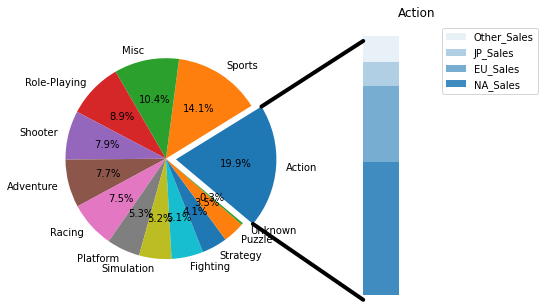

In [132]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [3305,2341,1734,1483,1307,1280,1243,884,865,847,680,578,50]
labels = ['Action','Sports','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle','Unknown']
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0]
# rotate so that first wedge is split by the x-axis
angle = -40
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.5, .29, .09, .1]
age_labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    #ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Action')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 4.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [37]:
#pd.set_option('display.max_rows', None)

#연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다

연도별 플랫폼 트랜드/ 꺾은선그래프

연도별 ㅈ장르 트랜드/ 꺾은선그래프

In [240]:
df_mean = round(df_clean.groupby(['Year'], as_index=False).mean(), 2)
df_mean

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,1176666.67,74444.44,0.00,13333.33,1264444.44
1,1981,726086.96,42608.70,0.00,6956.52,775652.17
2,1982,747777.78,45833.33,0.00,8611.11,802222.22
3,1983,456470.59,47058.82,476470.59,8235.29,988235.29
4,1984,2377142.86,150000.00,1019285.71,50000.00,3596428.57
5,1985,2409285.71,338571.43,1040000.00,65714.29,3853571.43
6,1986,595238.10,135238.10,943333.29,91904.76,1765714.24
7,1987,528749.94,88125.00,726875.00,12500.00,1356249.94
8,1988,1591333.33,439333.33,1050666.67,66000.00,3147333.33
9,1989,2655882.35,496470.59,1079999.94,88235.29,4320588.18


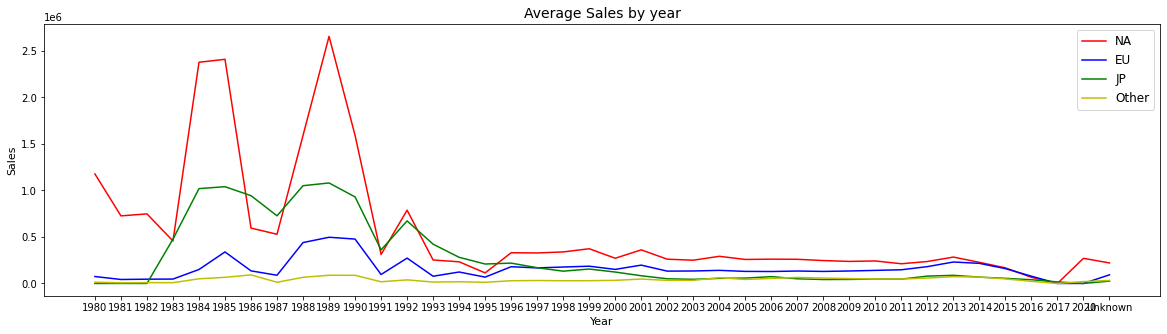

In [241]:
plt.figure(figsize=(20, 5))
plt.plot(df_mean.Year, df_mean.NA_Sales, color='r')
plt.plot(df_mean.Year, df_mean.EU_Sales, color='b')
plt.plot(df_mean.Year, df_mean.JP_Sales, color='g')
plt.plot(df_mean.Year, df_mean.Other_Sales, color='y')


plt.title('Average Sales by year', fontsize=14)
plt.ylabel('Sales', fontsize=11)
plt.xlabel('Year', fontsize=11)
plt.legend(['NA', 'EU', 'JP', 'Other'], fontsize=12)
plt.show()

In [242]:
df_sum = round(df_clean.groupby(['Year'], as_index=False).sum(), 2)
df_sum

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,10590000,670000,0,120000,11380000
1,1981,33400000,1960000,0,320000,35680000
2,1982,26920000,1650000,0,310000,28880000
3,1983,7760000,800000,8100000,140000,16800000
4,1984,33280000,2100000,14270000,700000,50350000
5,1985,33730000,4740000,14560000,920000,53950000
6,1986,12500000,2840000,19809999,1930000,37079999
7,1987,8459999,1410000,11630000,200000,21699999
8,1988,23870000,6590000,15760000,990000,47210000
9,1989,45150000,8440000,18359999,1500000,73449999


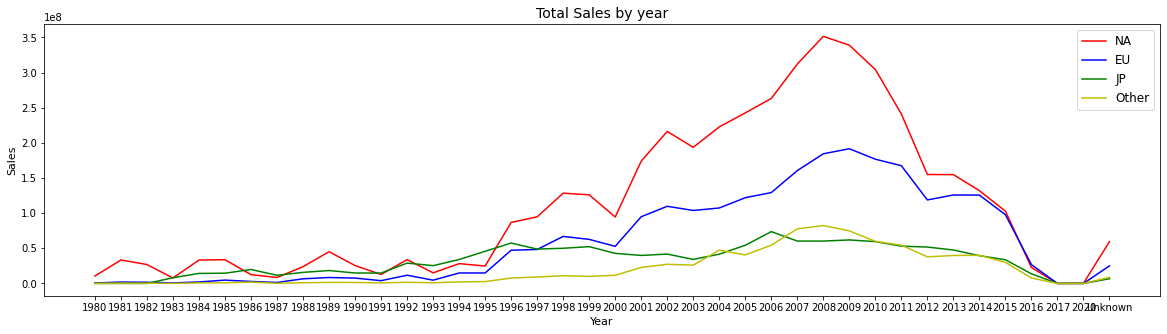

In [244]:
plt.figure(figsize=(20, 5))
plt.plot(df_sum.Year, df_sum.NA_Sales, color='r')
plt.plot(df_sum.Year, df_sum.EU_Sales, color='b')
plt.plot(df_sum.Year, df_sum.JP_Sales, color='g')
plt.plot(df_sum.Year, df_sum.Other_Sales, color='y')

plt.title('Total Sales by year', fontsize=14)
plt.ylabel('Sales', fontsize=11)
plt.xlabel('Year', fontsize=11)
plt.legend(['NA', 'EU', 'JP', 'Other'], fontsize=12)
plt.show()

In [143]:
df_clean['Total_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']
df_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


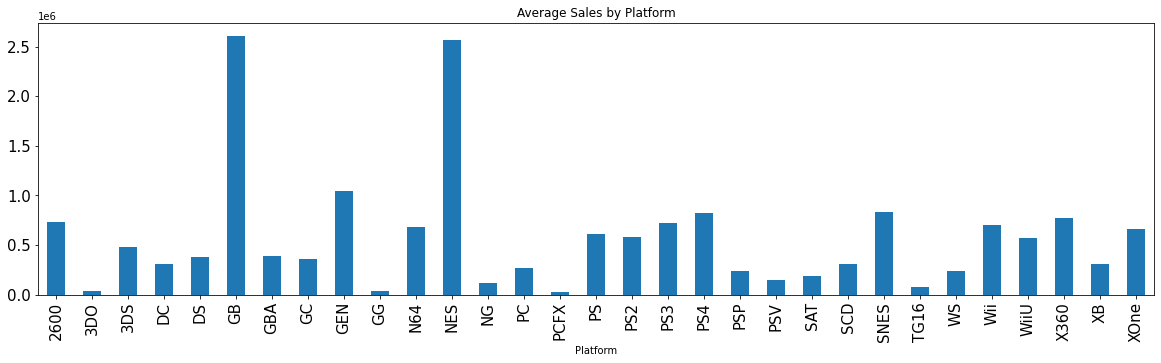

In [163]:
round(df_clean.groupby(['Platform'])['Total_Sales'].mean(), 2).plot(kind='bar', 
                                                                    title='Average Sales by Platform', 
                                                                    fontsize=15,
                                                                    figsize=(20,5));

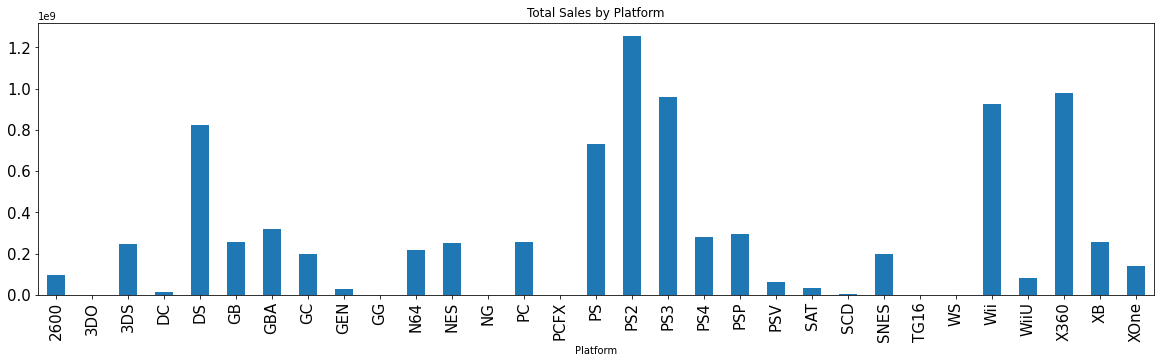

In [246]:
round(df_clean.groupby(['Platform'])['Total_Sales'].sum(), 2).plot(kind='bar', 
                                                                    title='Total Sales by Platform', 
                                                                    fontsize=15,
                                                                    figsize=(20,5));

In [175]:
round(df_clean.groupby(['Year','Platform']).mean(), 2)

NA_Sales   EU_Sales    JP_Sales  Other_Sales  Total_Sales
Year    Platform                                                             
1980    2600      1176666.67   74444.44        0.00     13333.33   1264444.44
1981    2600       726086.96   42608.70        0.00      6956.52    775652.17
1982    2600       747777.78   45833.33        0.00      8611.11    802222.22
1983    2600       494545.45   30909.09        0.00      5454.55    530909.09
        NES        386666.67   76666.67  1350000.00     13333.33   1826666.67
...                      ...        ...         ...          ...          ...
Unknown PSP        118750.00   68125.00    56250.00     41875.00    285000.00
        PSV        130000.00   60000.00    70000.00     40000.00    300000.00
        Wii        304117.65  118529.41    30882.35     41470.59    495000.00
        X360       224000.00   85666.67     4333.33     29000.00    343000.00
        XB         220476.19   61904.76        0.00     11428.57    293809.52

[257 rows x 5 columns]

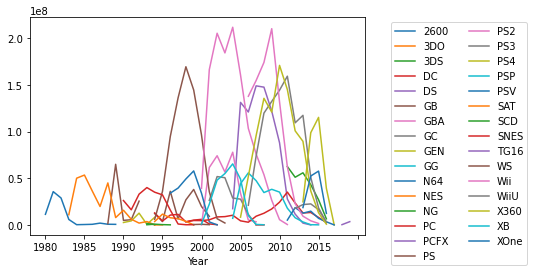

In [247]:
df_clean.groupby(['Year','Platform'])['Total_Sales'].sum().unstack().plot()
plt.legend(loc='upper right', ncol=2, bbox_to_anchor=(1.5, 1))

In [176]:
round(df_clean.groupby(['Platform']).mean(), 2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
2600,681203.01,41127.82,0.00,6842.11,729172.93
3DO,0.00,0.00,33333.33,0.00,33333.33
3DS,154950.88,114970.53,191257.37,24813.36,485992.14
DC,104423.08,32500.00,164615.38,5192.31,306730.77
DS,180633.38,89990.75,81169.67,27984.28,379778.09
GB,1166530.61,487959.18,868571.42,83673.47,2606734.68
GBA,228150.85,91545.01,57579.08,9403.89,386678.83
GC,240035.97,69622.30,38812.95,9316.55,357787.77
GEN,713703.70,204444.44,98888.89,32962.96,1050000.00


In [174]:
year_plaform.Total_Sales

Year     Platform
1980     2600        1264444.44
1981     2600         775652.17
1982     2600         802222.22
1983     2600         530909.09
         NES         1826666.67
                        ...    
Unknown  PSP          285000.00
         PSV          300000.00
         Wii          495000.00
         X360         343000.00
         XB           293809.52
Name: Total_Sales, Length: 257, dtype: float64

TypeError: ignored

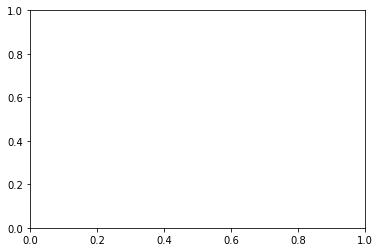

In [168]:
sns.barplot(data=df_clean, x="Year", y="Total_Sales", hue="Platform",height=8.27,  aspect=11.7/8.27)

In [161]:
year_plaform.Year

AttributeError: ignored

In [160]:
plt.plot(year_plaform.Year, year_plaform.NA_Sales)


plt.title('Sales according to the year', fontsize=14)
plt.ylabel('Sales', fontsize=11)
plt.xlabel('Year', fontsize=11)
#plt.legend(['NA'], fontsize=12)
plt.show()

AttributeError: ignored

In [39]:
round(df_clean.groupby(['Year','Genre']).mean(), 2)

NA_Sales   EU_Sales   JP_Sales  Other_Sales
Year    Genre                                                      
1980    Action         320000.00   20000.00       0.00         0.00
        Fighting       720000.00   40000.00       0.00     10000.00
        Misc           632500.00   37500.00       0.00      5000.00
        Shooter       3280000.00  215000.00       0.00     40000.00
        Unknown        460000.00   30000.00       0.00     10000.00
...                          ...        ...        ...          ...
Unknown Role-Playing    45882.35   28235.29  118823.53     13529.41
        Shooter        275555.56  104444.44    2962.96     29259.26
        Simulation      95625.00   11250.00   10000.00     10000.00
        Sports         315714.29  131190.48   14523.81     55238.10
        Strategy        81000.00   40000.00   36000.00     13000.00

[419 rows x 4 columns]

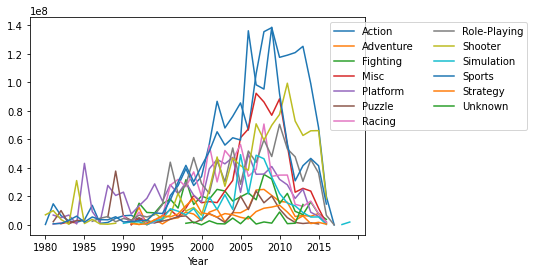

In [196]:
df_clean.groupby(['Year','Genre'])['Total_Sales'].sum().unstack().plot()
plt.legend(loc='upper right', ncol=2, bbox_to_anchor=(1.5, 1))

In [40]:
df_clean.groupby('Genre').mean()['NA_Sales']

Genre
Action          264692.888654
Adventure        82546.875000
Fighting        263518.297521
Misc            235322.952134
Platform        505022.623303
Puzzle          213408.302768
Racing          287361.220434
Role-Playing    215468.643965
Shooter         445233.356542
Simulation      211514.448555
Sports          290696.281931
Strategy        101029.411765
Unknown         412200.000000
Name: NA_Sales, dtype: float64

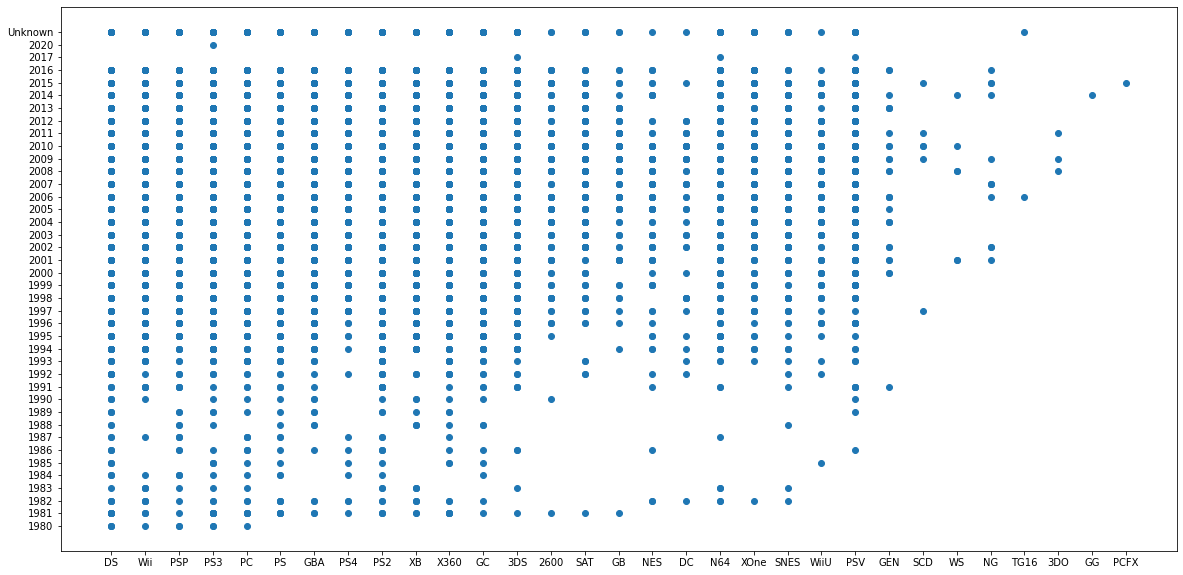

In [41]:
plt.figure(figsize=(20, 10))
plt.scatter(df_clean['Platform'], df_clean['Year'].sort_values(ascending=True));

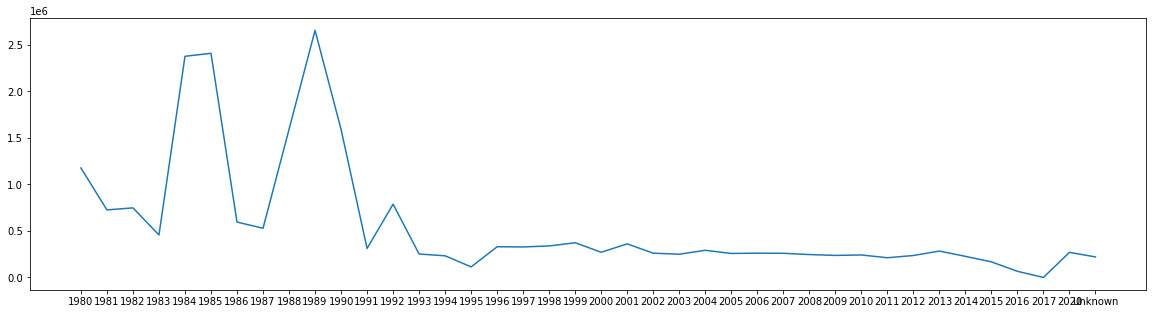

In [42]:
plt.figure(figsize=(20, 5))

NA_Sales_group_Year = df_clean['NA_Sales'].groupby(df_clean['Year'])
#print(round(NA_Sales_group_Year.sum(), 2))

plt.plot(NA_Sales_group_Year.mean());



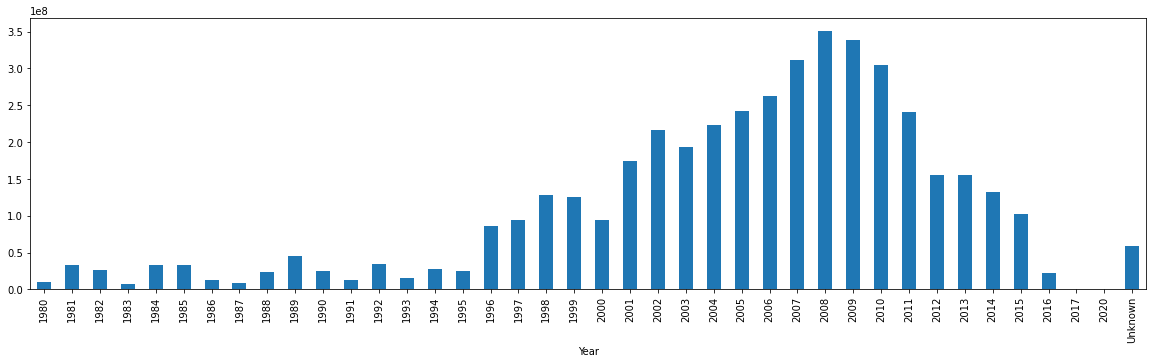

In [43]:
plt.figure(figsize=(20, 5))
NA_Sales_group_Year.sum().plot(kind='bar');

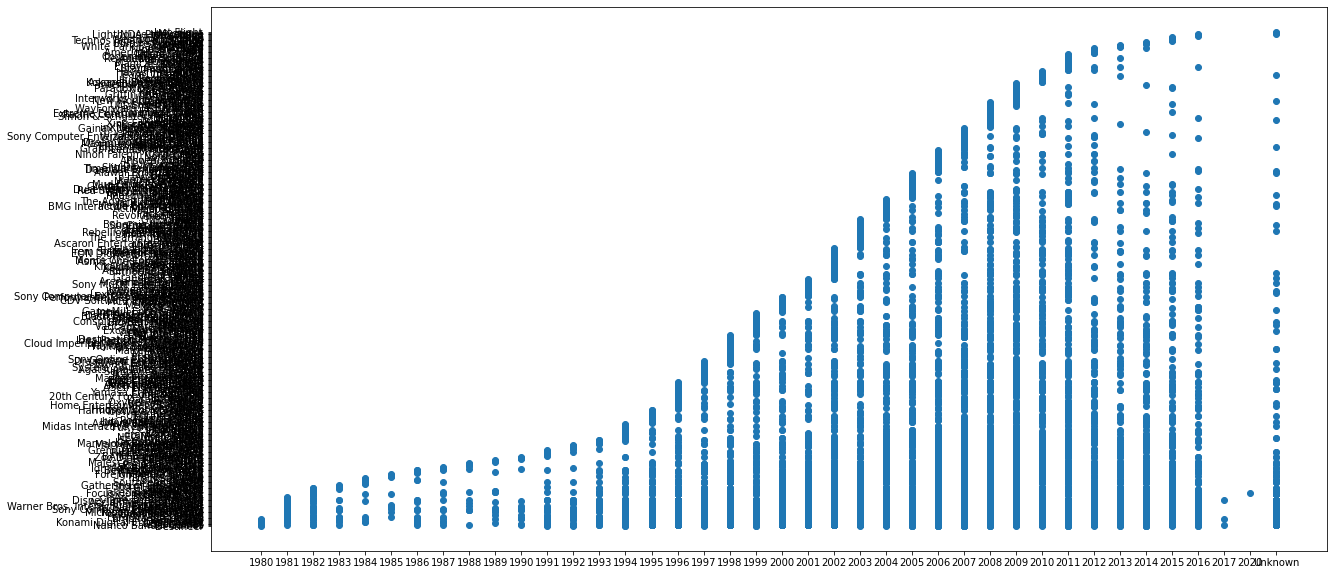

In [44]:
plt.figure(figsize=(20, 10))
plt.scatter(df_clean['Year'].sort_values(ascending=True), df_clean['Publisher']);

In [45]:
#round(df_clean.groupby(['Publisher']).describe(), 2)

# 새 섹션
Name	Platform	Year	Genre	Publisher	NA_Sales	EU_Sales	JP_Sales	Other_Sales

df_clean

나라별ㅇ판매량 의 장르 카테고리를 막대그래프로 원


*   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다

연도별 잘팔리는 플랫폼 트랜드 그래프
연도별 발팔리는 장르 트랜드